In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import utils
import dataloaders
import torchvision
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)

### Dataset

In [2]:
# Load the dataset and print some stats
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.5], [0.5])])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

The tensor containing the images has shape: torch.Size([64, 1, 32, 32]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: -1.0


In [3]:
## TASK 2 A
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Conv2d(1,32,5,1,2),
        nn.MaxPool2d(2,2),
        nn.Conv2d(32,64,3,1,1),
        nn.MaxPool2d(2,2),
        nn.Conv2d(64,128,3,1,1),
        nn.MaxPool2d(2,2),
        nn.Flatten(),
        nn.Linear(128*4*4,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [4]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [5]:
# Hyperparameters
learning_rate = .02
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Train model

In [6]:
def train_model(opt):
    trainer = Trainer(
      model=model,
      dataloader_train=dataloader_train,
      dataloader_test=dataloader_test,
      batch_size=batch_size,
      loss_function=loss_function,
      optimizer=opt
    )
    train_loss_dict, test_loss_dict = trainer.train(num_epochs)
    return train_loss_dict, test_loss_dict
    
train_loss_dict, test_loss_dict = train_model(optimizer)


Training epoch 4: 100%|██████████████████████| 937/937 [00:04<00:00, 207.98it/s]


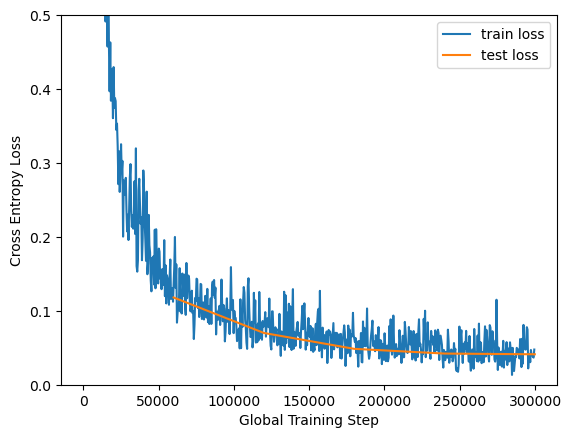

Final Test loss: 0.0411913944877759. Final Test accuracy: 0.9874


In [7]:
# We can now plot the training loss with our utility script
def plot_result(train_loss, test_loss, train_label, test_label):
    # Plot loss
    utils.plot_loss(train_loss_dict, label=train_label)
    utils.plot_loss(test_loss_dict, label=test_label)
    # Limit the y-axis of the plot (The range should not be increased!)
    plt.ylim([0, .5])
    plt.legend()
    plt.xlabel("Global Training Step")
    plt.ylabel("Cross Entropy Loss")
    plt.savefig(utils.image_output_dir.joinpath("task2a_plot.png"))
    plt.show()
    
    final_loss, final_acc = utils.compute_loss_and_accuracy(
        dataloader_test, model, loss_function)
    print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")
plot_result(train_loss_dict, test_loss_dict, "train loss", "test loss")

In [8]:
## TASK 2 B
## Update hyperparameters
learning_rate_adam = 0.001
optimizer_adam = torch.optim.Adam(model.parameters(),lr = learning_rate_adam)

## Train model
train_loss_dict_adam, test_loss_dict_adam = train_model(optimizer_adam)

## Plot result
plot_result(train_loss_dict_adam, test_loss_dict_adam, "training with adam", "testing with adam")
plot_result(train_loss_dict, test_loss_dict, "training loss", "test loss") 

NameError: name 'train_loss_dict_adam' is not defined